In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='dark')

print("Pandas Ver.: " + pd.__version__)
print("Seaborn Ver.: " + sns.__version__)
print("Numpy Ver.: " + np.__version__)

Pandas Ver.: 1.5.3
Seaborn Ver.: 0.12.2
Numpy Ver.: 1.24.2


# Introduction

This is a dataset obtained from Kaggle, and it can be found here: [Steam Store Games (Clean Dataset)](https://www.kaggle.com/datasets/nikdavis/steam-store-games). The data was gathered around May 2019, utilizing the Steam Store and SteamSpy APIs, as stated by the dataset's author on the description.

This is an exploratory analysis of this dataset, mainly utilizing Pandas and its functions. I will try to answer the following questions:

- Top 20 games with the most positive ratings
- Top 20 games with the most negative ratings
- Top 20 games with the highest average playtime
- Price analysis
- Distribution of genres
- Publishers with the highest number of games
- Games released by year
- What does ownership look like

## **Initial Dataset Examination**

In [2]:
steam_df = pd.read_csv("./data/steam.csv")
steam_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
steam_df.tail()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19


Getting a summary of the statistics in my dataset

In [4]:
steam_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [5]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Verifying how many lines and columns my dataset has

In [6]:
print(steam_df.shape)

(27075, 18)


Checking if there are any null values in my dataframe. This is good practice, although this dataset was already cleaned by the author.

In [7]:
print(steam_df.isnull().sum())

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


Columns appid and steamspy_tags will be dropped. The former because it doesn't have any relevant information for this exploratory analysis, and the latter because it has very similar data to the genres column, and that is the chosen column to be used in this analysis.

In [8]:
steam_df = steam_df.drop(["appid", "steamspy_tags"], axis=1)
steam_df.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99


Altering the genres column inplace. Since this column has many genres separated by semicolons, we will disregard the ones that come after the first and consider that the main genre.

In [9]:
split_genres = steam_df["genres"].str.split(";", n=1, expand=True)
steam_df["genres"] = split_genres[0]
steam_df.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99


There's a lot of zeroes in the column required_age, so a query is run to check whether that is the situation for the entire column or not, in case it's bad data

In [10]:
steam_df.query("required_age > 0")

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
46,Quake IV,2011-08-04,1,RavenSoft / id Software,Bethesda Softworks,windows,18,Single-player;Multi-player;Steam Cloud,Action,0,891,171,36,32,200000-500000,12.99
132,Company of Heroes - Legacy Edition,2007-07-17,1,Relic Entertainment,SEGA,windows,18,Single-player;Multi-player;Steam Trading Cards...,Violent,0,4772,320,175,186,2000000-5000000,0.00
133,"Warhammer® 40,000: Dawn of War® - Game of the ...",2007-08-07,1,Relic Entertainment,SEGA,windows,16,Single-player;Multi-player;Steam Trading Cards...,Strategy,0,3485,206,309,340,1000000-2000000,9.99
134,"Warhammer® 40,000: Dawn of War® - Dark Crusade",2007-08-07,1,Relic Entertainment,SEGA,windows,16,Single-player;Multi-player;Steam Cloud,Strategy,0,2849,133,543,620,1000000-2000000,9.99
136,Condemned: Criminal Origins,2012-10-29,1,Monolith,SEGA,windows,18,Single-player,Action,0,1243,221,312,312,200000-500000,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26707,Faux,2019-03-18,1,Pelagames,Pelagames,windows,12,Single-player;Steam Achievements;Partial Contr...,Action,10,3,1,0,0,0-20000,2.09
26728,Roach Killer,2019-04-15,1,Highlight Visual Effects Development,Highlight Visual Effects Development,windows,16,Single-player;Steam Achievements;Steam Leaderb...,Action,1,1,2,0,0,0-20000,4.79
26732,oscar and paul,2019-03-15,1,NGS GAMES STUDIO;PIXEL ART GAME,NGS GAMES STUDIO,windows,12,Single-player,Action,0,0,1,0,0,0-20000,0.79
26983,Adecke - Cards Games Deluxe,2019-04-20,1,Philippe Pelchat,Philippe Pelchat,windows;mac;linux,12,Single-player,Casual,0,3,1,0,0,0-20000,7.19


## **Top 20 Games with the Most Positive Ratings**

Discovering the top 20 games with the most positive reviews on Steam. First, the 20 largest values in the positive_ratings column will be filtered.

In [11]:
steam_df['positive_ratings'].nlargest(n=20)

25       2644404
22        863507
19        515879
12836     496184
121       363721
2478      329061
1467      308657
3362      292574
1120      255600
21        251789
5235      251178
2031      242561
1025      237303
1634      226541
2016      220370
2964      202930
1596      176769
8129      169580
4712      145035
903       144595
Name: positive_ratings, dtype: int64

Then, a query is applied to select only those games whose quantity of positive ratings is above the last number retrieved in the filter. In this case, that would be 144595.

In [12]:
steam_df.query("positive_ratings >= 144595").sort_values(by="positive_ratings", ascending=False)[["name", "developer", "publisher", "genres", "positive_ratings"]]

,name,developer,publisher,genres,positive_ratings
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Action,2644404
22,Dota 2,Valve,Valve,Action,863507
19,Team Fortress 2,Valve,Valve,Action,515879
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,Action,496184
121,Garry's Mod,Facepunch Studios,Valve,Indie,363721
2478,Grand Theft Auto V,Rockstar North,Rockstar Games,Action,329061
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,Action,308657
3362,Unturned,Smartly Dressed Games,Smartly Dressed Games,Action,292574
1120,Terraria,Re-Logic,Re-Logic,Action,255600
21,Left 4 Dead 2,Valve,Valve,Action,251789


Unsurprisingly, the podium is occupied by the wildly popular PC games Counter-Strike: Global Offensive, Dota 2 and Team Fortress 2, all three developed by Steam's own parent company, Valve Software.

## **Top 20 Games with the Most Negative Ratings**

Now, going to the opposite end, discovering the top 20 games with the most negative reviews on Steam. Filtering for the the 20 largest values in the negative_ratings column.

In [13]:
steam_df["negative_ratings"].nlargest(20)

12836    487076
25       402313
22       142079
2478     139308
7809      91664
1506      77169
4712      66603
5235      59620
1467      56523
2563      56488
2016      53709
5916      45377
6046      44985
12965     35294
1607      34416
19        34036
8129      32407
3362      31482
3251      30987
3347      25920
Name: negative_ratings, dtype: int64

Applying a query to select only those games whose quantity of negative ratings is above the last number retrieved in the filter, 25920.

In [14]:
steam_df.query("negative_ratings >= 25920").sort_values(by="negative_ratings", ascending=False)[["name", "developer", "publisher", "genres", "negative_ratings"]]

,name,developer,publisher,genres,negative_ratings
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,Action,487076
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Action,402313
22,Dota 2,Valve,Valve,Action,142079
2478,Grand Theft Auto V,Rockstar North,Rockstar Games,Action,139308
7809,Z1 Battle Royale,NantG,Daybreak Game Company,Action,91664
1506,DayZ,Bohemia Interactive,Bohemia Interactive,Action,77169
4712,ARK: Survival Evolved,Studio Wildcard;Instinct Games;Efecto Studios;...,Studio Wildcard,Action,66603
5235,Tom Clancy's Rainbow Six® Siege,Ubisoft Montreal,Ubisoft,Action,59620
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,Action,56523
2563,No Man's Sky,Hello Games,Hello Games,Action,56488


Popular video games, especially those with live-service and multiplayer components, can often be very divisive or controversial due to the fickle nature of the player bases and the state of their satisfaction or dissatisfaction with the games as they get updated and changed. Thus Counter-Strike: Global Offensive and Dota 2 occupy 2 of the 3 spots of games with the most negative reviews.

## **Top 20 Games with the Highest Average Playtime**

Taking a look at how much time people spend on Steam's most popular games, on average.

First, the average_playtime column will be converted from minutes to hours for better visualization

In [15]:
steam_df["average_playtime"] = steam_df["average_playtime"] / 60

In [16]:
steam_df["average_playtime"].nlargest(20)

9201     3177.083333
1478     1587.416667
6014     1587.366667
8969     1058.016667
3930      920.066667
3969      910.300000
2435      736.150000
23409     727.200000
2023      717.900000
8919      646.750000
12195     600.483333
744       481.616667
3803      456.250000
15212     422.066667
16413     422.033333
16143     421.950000
22        399.066667
12836     382.300000
25        374.900000
2737      354.116667
Name: average_playtime, dtype: float64

In [17]:
steam_df.query("average_playtime >= 350").sort_values(by="average_playtime", ascending=False).head(20)[["name", "developer", "publisher", "genres", "average_playtime"]]

,name,developer,publisher,genres,average_playtime
9201,The Abbey of Crime Extensum,Manuel Pazos;Daniel Celemín,Manuel Pazos;Daniel Celemín,Adventure,3177.083333
1478,The Banner Saga: Factions,Stoic,Versus Evil,Free to Play,1587.416667
6014,The Secret of Tremendous Corporation,Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej,dosowisko.net,Adventure,1587.366667
8969,PRICE,YETU GAME,YETU GAME,Adventure,1058.016667
3930,Boundless,Wonderstruck,Square Enix,Action,920.066667
3969,Shroud of the Avatar: Forsaken Virtues,Portalarium,Portalarium,Free to Play,910.300000
2435,X-Plane 11,Laminar Research,Laminar Research,Simulation,736.150000
23409,懒人修仙传,托更的修罗,托更的修罗,Casual,727.200000
2023,Fantasy Grounds,"SmiteWorks USA, LLC","SmiteWorks USA, LLC",Indie,717.900000
8919,Screeps,Screeps,Screeps,Indie,646.750000


## **Price Analysis**

A simple price analysis will be shown below, focusing on the split of free vs. paid games, average price by year and general price distribution. 

release_year and release_month columns will be created from the release_date one, as it will be used for this price analysis and a few other metrics down the line

In [18]:
steam_df["release_year"] = steam_df["release_date"].str.split("-").str[0]
steam_df["release_month"] = steam_df["release_date"].str.split("-").str[1]
steam_df.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,release_year,release_month
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,293.533333,317,10000000-20000000,7.19,2000,11
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,4.616667,62,5000000-10000000,3.99,1999,04
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,3.116667,34,5000000-10000000,3.99,2003,05
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,4.300000,184,5000000-10000000,3.99,2001,06
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,10.400000,415,5000000-10000000,3.99,1999,11


A new boolean column will be added called free, this column displays whether a game is free or paid

In [19]:
steam_df = steam_df.assign(**{"free": steam_df.price == 0})
steam_df.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,release_year,release_month,free
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,293.533333,317,10000000-20000000,7.19,2000,11,False
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,4.616667,62,5000000-10000000,3.99,1999,04,False
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,3.116667,34,5000000-10000000,3.99,2003,05,False
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,4.300000,184,5000000-10000000,3.99,2001,06,False
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,10.400000,415,5000000-10000000,3.99,1999,11,False


The pie chart represents the split between free and paid games present on Steam

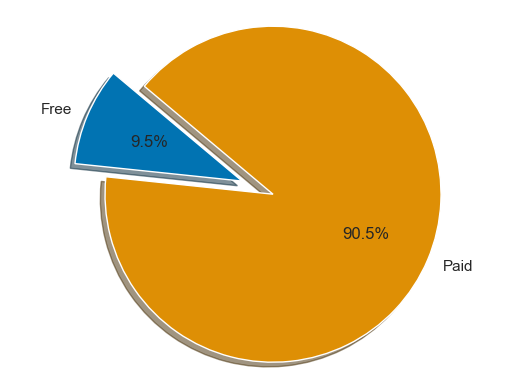

In [20]:
free_prices_dict = dict(steam_df.free.value_counts())
labels = "Free", "Paid"
sizes = [free_prices_dict[True], free_prices_dict[False]]
explode = (0.2, 0)

with sns.color_palette('colorblind'):
    plt.pie(sizes, explode=explode, labels=labels, 
            autopct='%1.1f%%', shadow=True, startangle=140)
    
plt.axis('equal')
plt.show()

This is a representation of game prices.

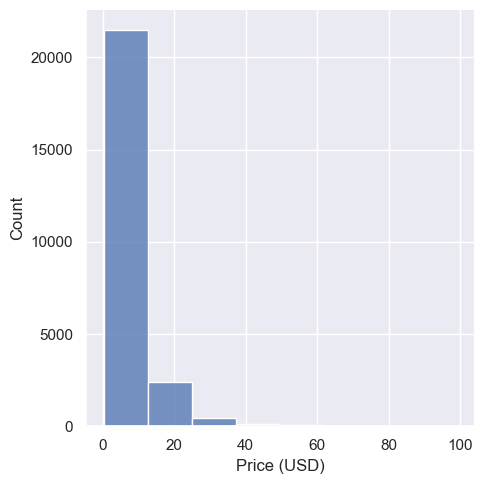

In [21]:
game_prices = steam_df[(steam_df["price"] > 0.00) & (steam_df.price <= 100)]["price"]

g = sns.displot(data=game_prices, bins=8).set_xlabels(label='Price (USD)')
plt.grid()
plt.show()

In [22]:
print(sorted(steam_df["release_year"].unique()))

['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [23]:
average_price = steam_df.groupby("release_year")["price"].mean()
print(average_price)

release_year
1997    5.990000
1998    7.190000
1999    3.990000
2000    5.590000
2001    1.995000
2002    7.990000
2003    2.993333
2004    5.758333
2005    4.026667
2006    7.558542
2007    5.633011
2008    6.535241
2009    6.990393
2010    7.388866
2011    7.527824
2012    8.588563
2013    8.694737
2014    7.462797
2015    6.419072
2016    5.893765
2017    5.891822
2018    5.565001
2019    6.191536
Name: price, dtype: float64


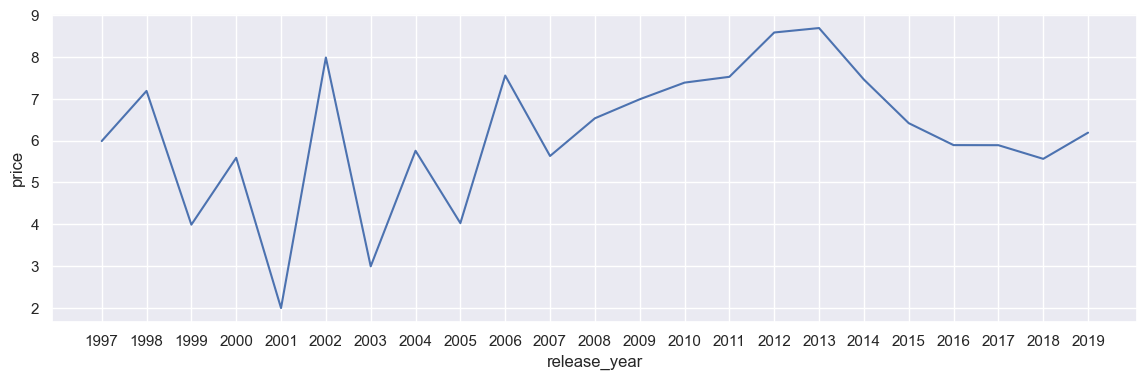

In [33]:
g = sns.lineplot(data=average_price, x="release_year", y=average_price)

sns.set(rc={'figure.figsize':(14,4)})
plt.show()

## **Distribution of Genres**

Analyzing the amount of games in each category

In [25]:
game_genres = steam_df["genres"].value_counts()[:15]
print(game_genres)

Action                  11212
Adventure                5256
Casual                   4373
Indie                    2623
Violent                   709
Simulation                631
Strategy                  532
RPG                       407
Free to Play              395
Sexual Content            245
Racing                    197
Nudity                    112
Sports                     83
Gore                       81
Animation & Modeling       66
Name: genres, dtype: int64


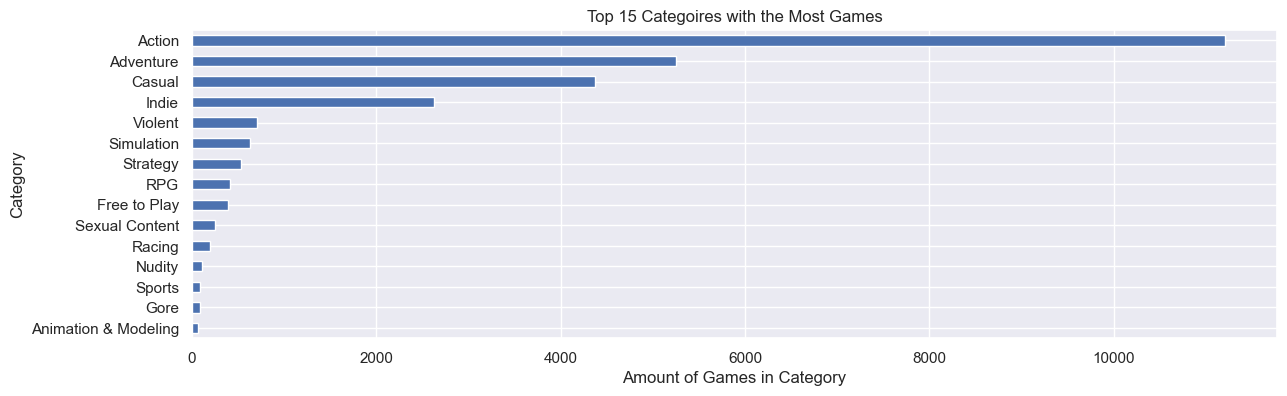

In [26]:
game_genres.plot(kind="barh")
plt.gca().invert_yaxis()

plt.xlabel('Amount of Games in Category')
plt.ylabel('Category')
plt.title('Top 15 Categoires with the Most Games')

sns.set(rc={'figure.figsize':(8,4)})

plt.show()

## **Publishers and Developers with the Highest Number of Games**

In [27]:
publishers = steam_df["publisher"].value_counts()[:15]
print(publishers)

Big Fish Games                212
Strategy First                136
Ubisoft                       111
THQ Nordic                     98
Square Enix                    97
Sekai Project                  96
Choice of Games                94
1C Entertainment               88
Dagestan Technology            88
SEGA                           78
Degica                         77
Plug In Digital                72
KISS ltd                       71
KOEI TECMO GAMES CO., LTD.     71
Slitherine Ltd.                71
Name: publisher, dtype: int64


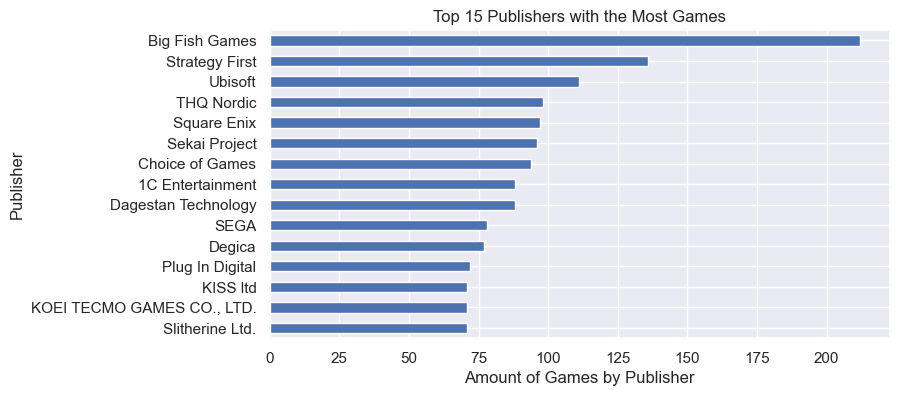

In [28]:
publishers.plot(kind="barh")
plt.gca().invert_yaxis()

plt.xlabel('Amount of Games by Publisher')
plt.ylabel('Publisher')
plt.title('Top 15 Publishers with the Most Games')

sns.set(rc={'figure.figsize':(8,4)})

plt.show()

In [29]:
developers = steam_df["developer"].value_counts()[:15]
print(developers)

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
For Kids                      36
Humongous Entertainment       36
EnsenaSoft                    35
Nekyau Games                  32
Eipix Entertainment           32
Warfare Studios               31
Name: developer, dtype: int64


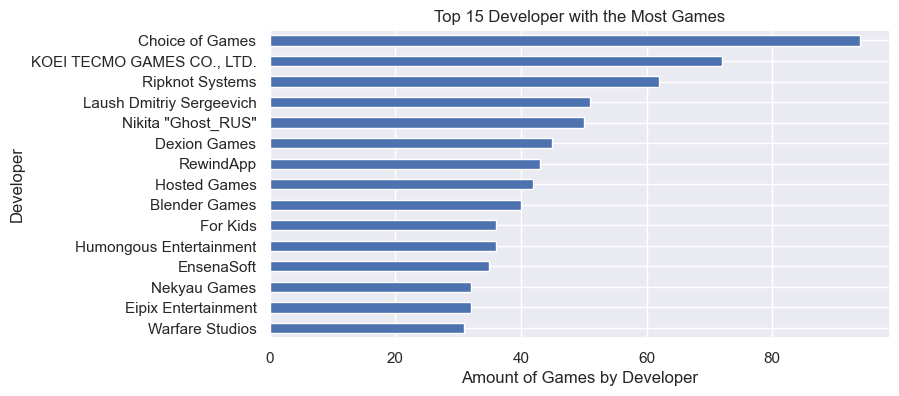

In [30]:
developers.plot(kind="barh")
plt.gca().invert_yaxis()

plt.xlabel('Amount of Games by Developer')
plt.ylabel('Developer')
plt.title('Top 15 Developer with the Most Games')

sns.set(rc={'figure.figsize':(8,4)})

plt.show()

## **Releases by Year**

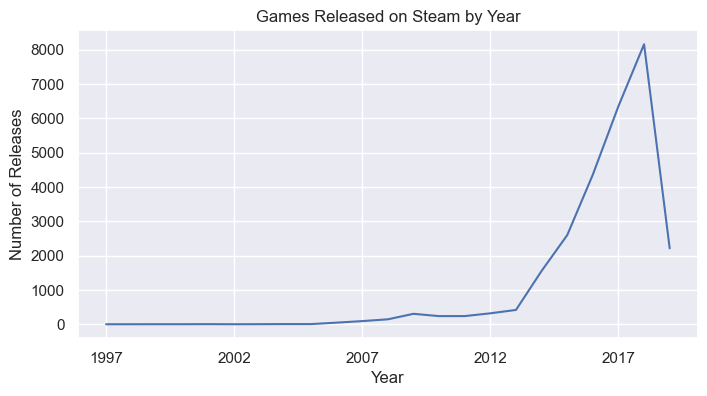

In [31]:
steam_df["release_year"].value_counts().sort_index().plot(kind="line")

plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Games Released on Steam by Year')

sns.set(rc={'figure.figsize':(8,4)})

plt.show()

## **Game Ownership**

In [34]:
temp_df = pd.DataFrame()
temp_df[['lower', 'upper']] = steam_df['owners'].str.split('-', expand = True)
temp_df['lower'] = temp_df['lower'].astype('int')
temp_df['upper'] = temp_df['upper'].astype('int')
temp_df['owner_median'] = (temp_df['lower'] + temp_df['upper']) / 2
temp_df

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,5000000,10000000,7500000.0
...,...,...,...
27070,0,20000,10000.0
27071,0,20000,10000.0
27072,0,20000,10000.0
27073,0,20000,10000.0


In [35]:
steam_df["owner_median"] = temp_df["owner_median"]
steam_df.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,release_year,release_month,free,owner_median
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,293.533333,317,10000000-20000000,7.19,2000,11,False,15000000.0
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,4.616667,62,5000000-10000000,3.99,1999,04,False,7500000.0
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,3.116667,34,5000000-10000000,3.99,2003,05,False,7500000.0
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,4.300000,184,5000000-10000000,3.99,2001,06,False,7500000.0
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,10.400000,415,5000000-10000000,3.99,1999,11,False,7500000.0


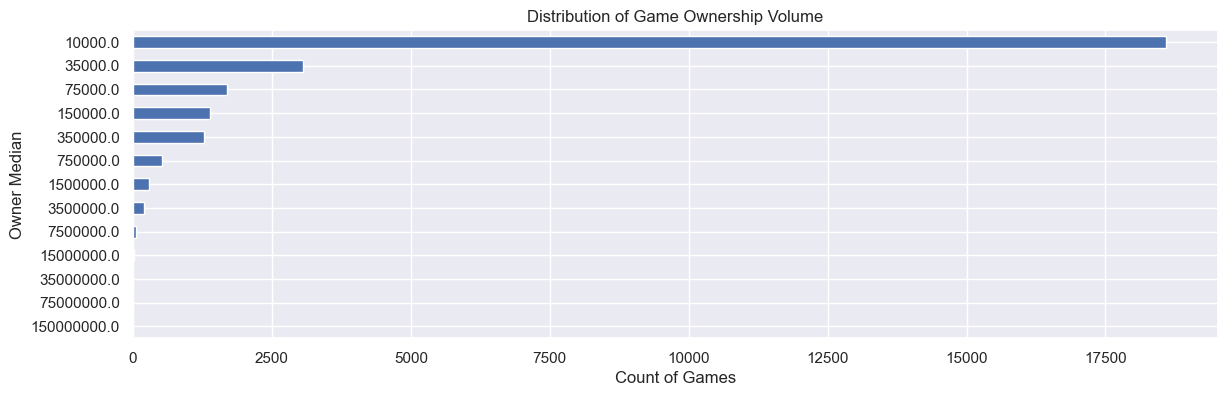

In [39]:
plt.figure()

steam_df['owner_median'].value_counts().sort_index().plot(kind = 'barh')

plt.gca().invert_yaxis()
plt.xlabel('Count of Games')
plt.ylabel('Owner Median')
plt.title('Distribution of Game Ownership Volume')

plt.show()

Top 10 games by ownership

In [40]:
steam_df.sort_values(by = 'owner_median', ascending = False).head(10)[['name', 'owner_median']]

,name,owner_median
22,Dota 2,150000000.0
25,Counter-Strike: Global Offensive,75000000.0
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000.0
19,Team Fortress 2,35000000.0
3362,Unturned,35000000.0
1634,Warframe,35000000.0
1727,War Thunder,15000000.0
23,Portal 2,15000000.0
1025,The Elder Scrolls V: Skyrim,15000000.0
1467,PAYDAY 2,15000000.0
